# Loan Payback - Exploratory Data Analysis

## Goal
* Predict the probability that a borrower will pay back their loan.

## Evaluation
* Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Loan Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.

### Files
* `train.csv` - the training set
* `test.csv` - the test set
* `sample_submission.csv` - a sample submission file in the correct format

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## 1. Data Loading

In [2]:
try:
    train_df = pd.read_csv('data/train.csv')
    test_df = pd.read_csv('data/test.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Data files not found. Please check the 'data' directory.")

Data loaded successfully.


## 2. Data Overview

In [3]:
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

display(train_df.head())

Training Data Shape: (593994, 13)
Test Data Shape: (254569, 12)


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
train_df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


## 3. Missing Values Analysis

In [6]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing values per column:")
    print(missing_values)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=45)
    plt.title("Missing Values Count")
    plt.show()
else:
    print("No missing values found in the training dataset.")

No missing values found in the training dataset.


## 4. Target Variable Analysis
Target Variable: `loan_paid_back`

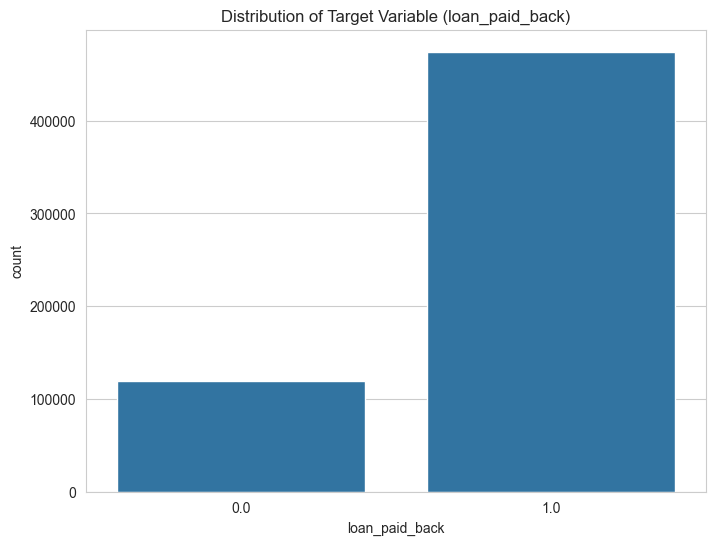

loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


In [7]:
target_col = 'loan_paid_back'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_col, data=train_df)
plt.title('Distribution of Target Variable (loan_paid_back)')
plt.show()

print(train_df[target_col].value_counts(normalize=True))

## 5. Feature Analysis

In [8]:
numerical_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
categorical_features = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

### 5.1 Numerical Features

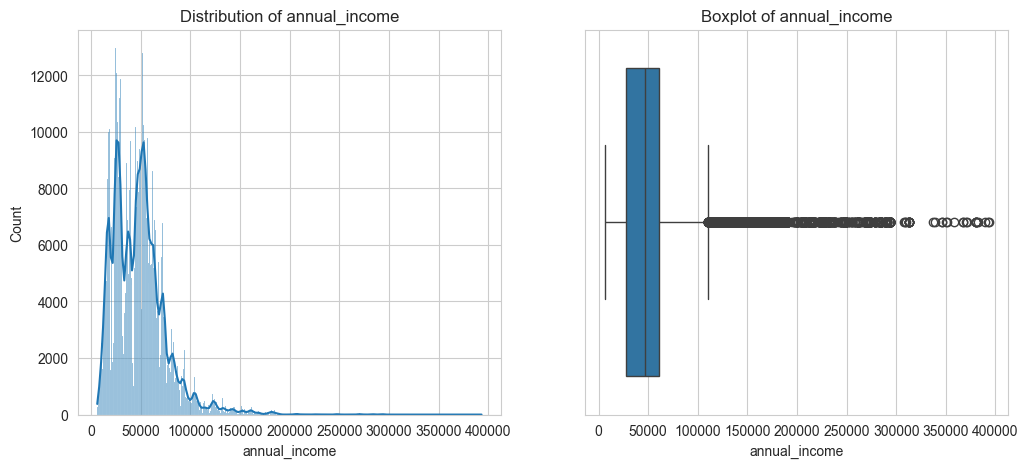

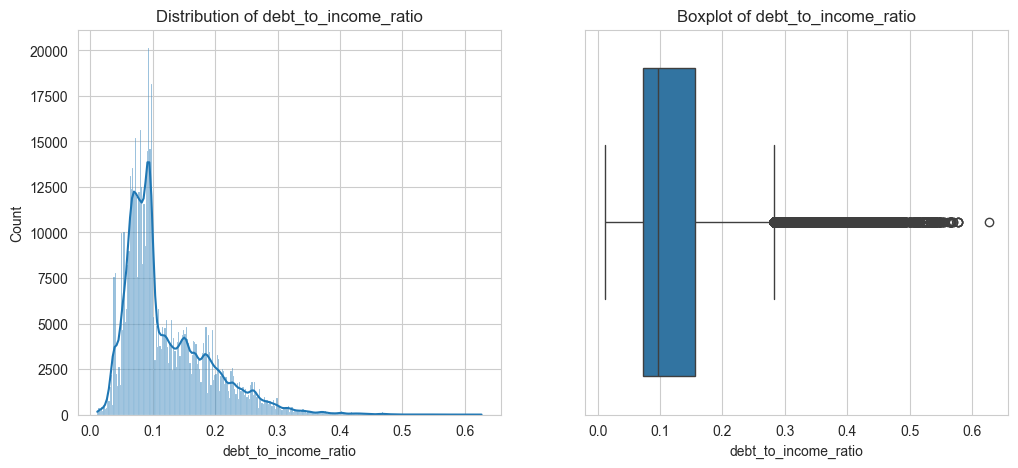

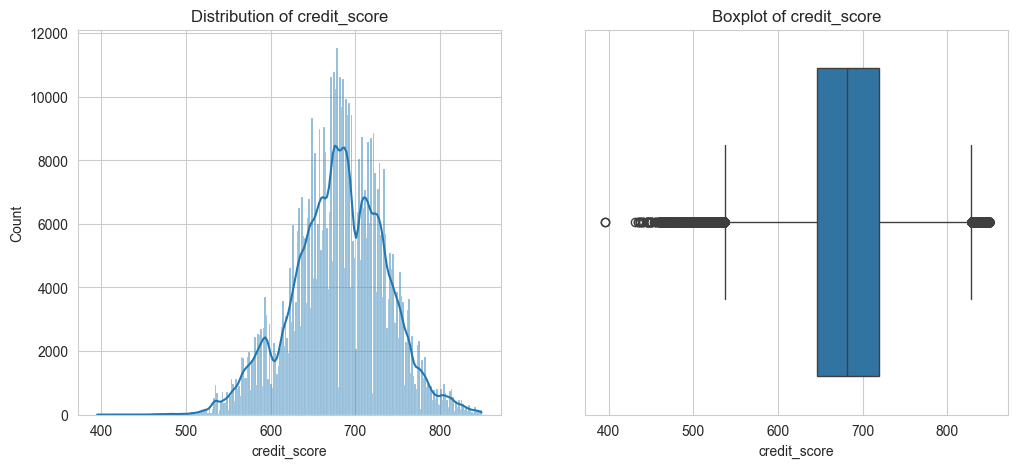

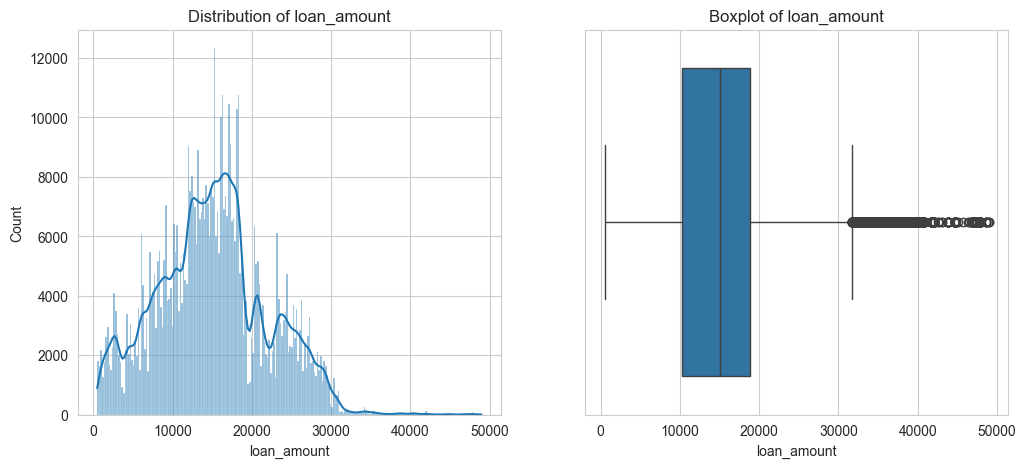

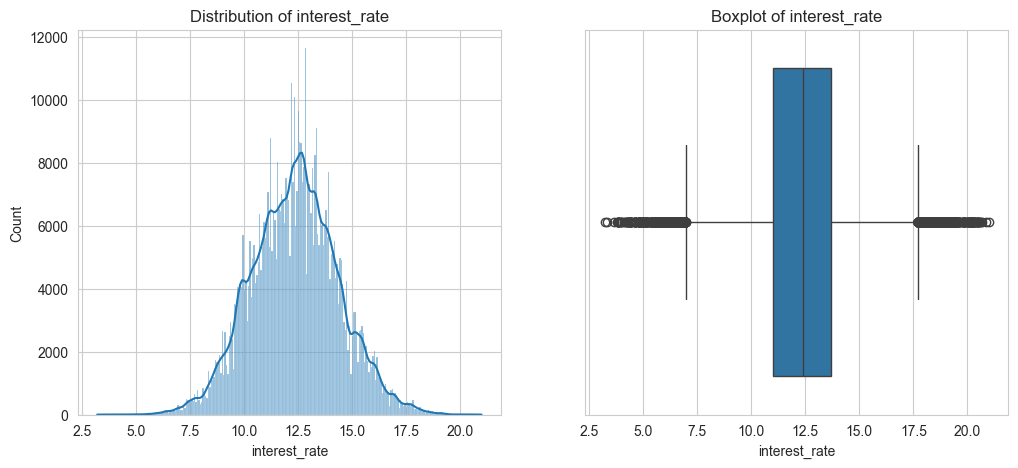

In [9]:
for col in numerical_features:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

### 5.2 Categorical Features

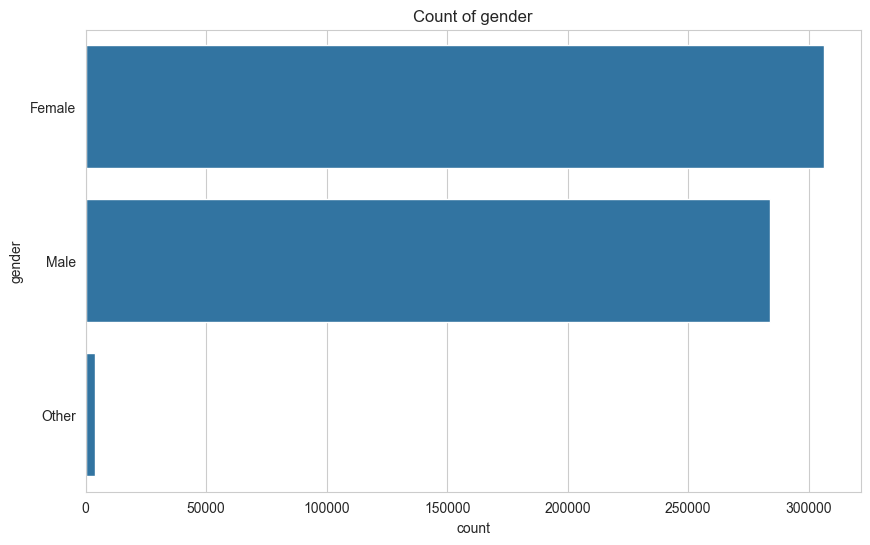

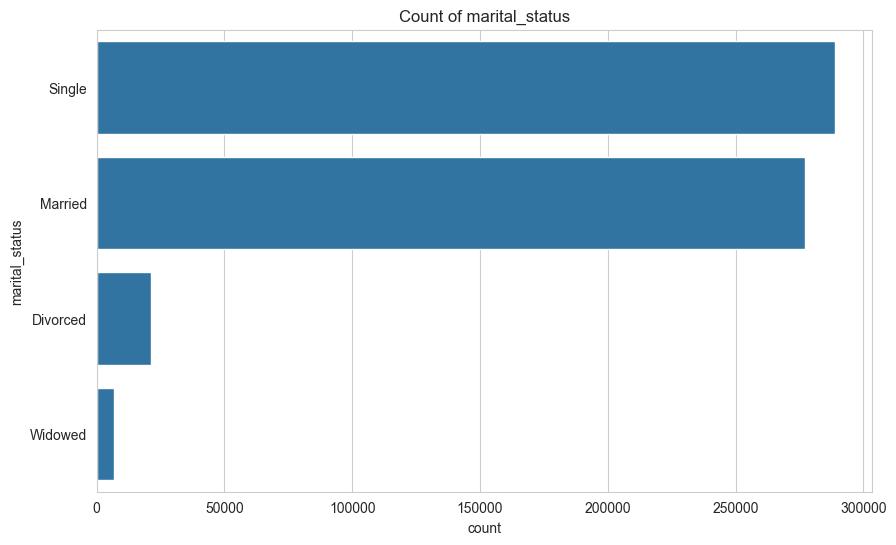

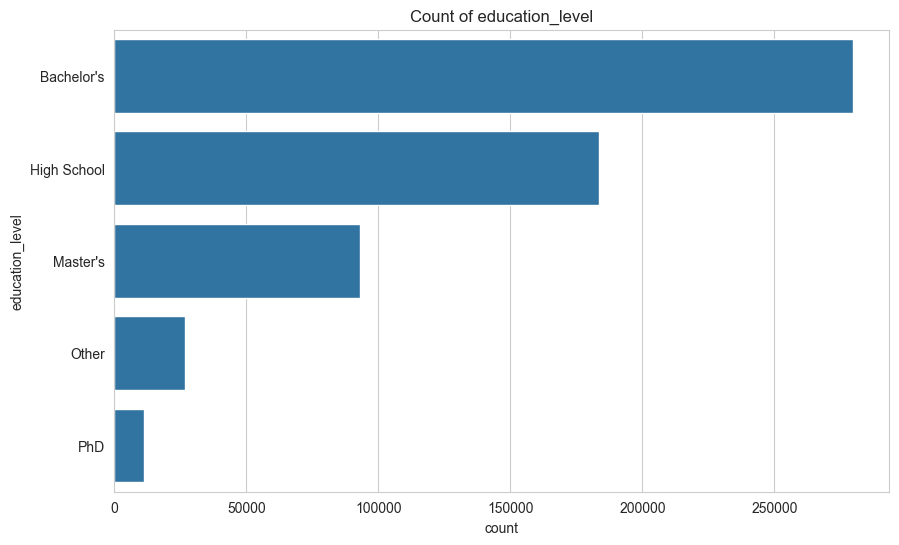

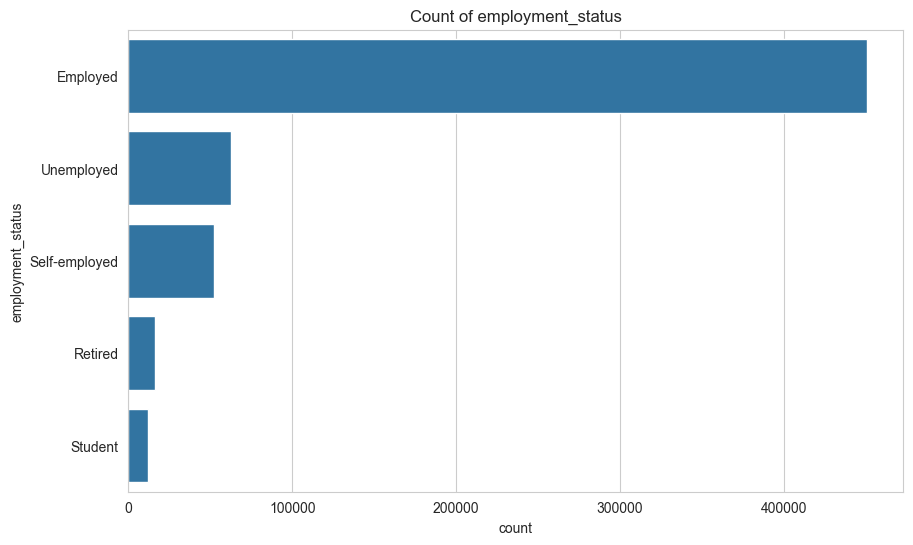

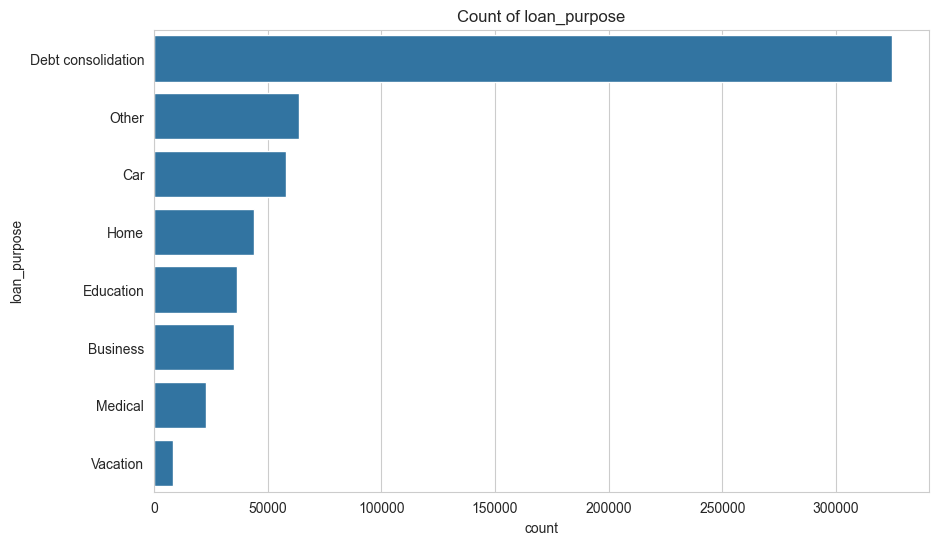

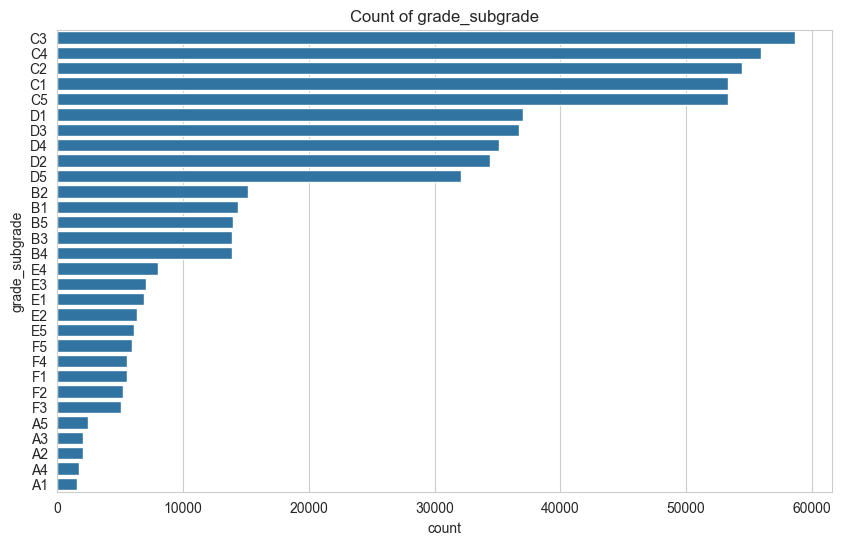

In [10]:
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

## 6. Bivariate Analysis

### 6.1 Numerical Features vs Target

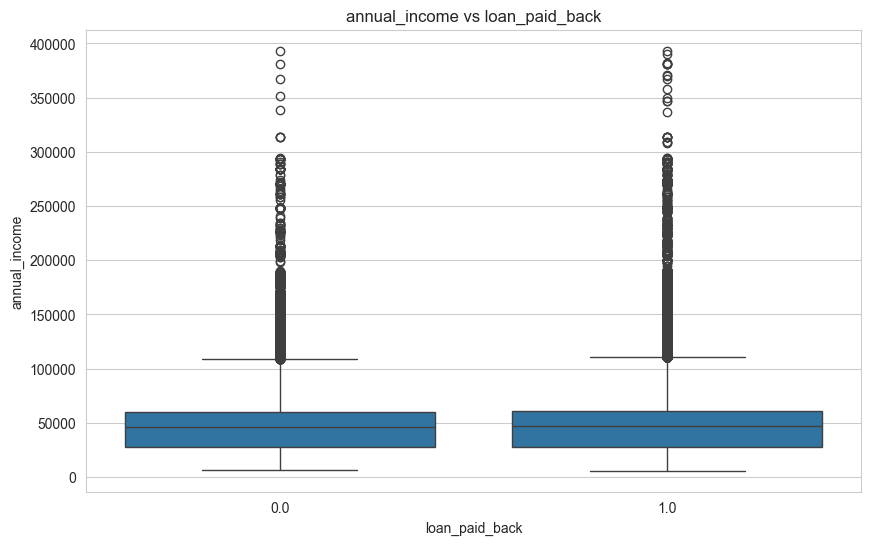

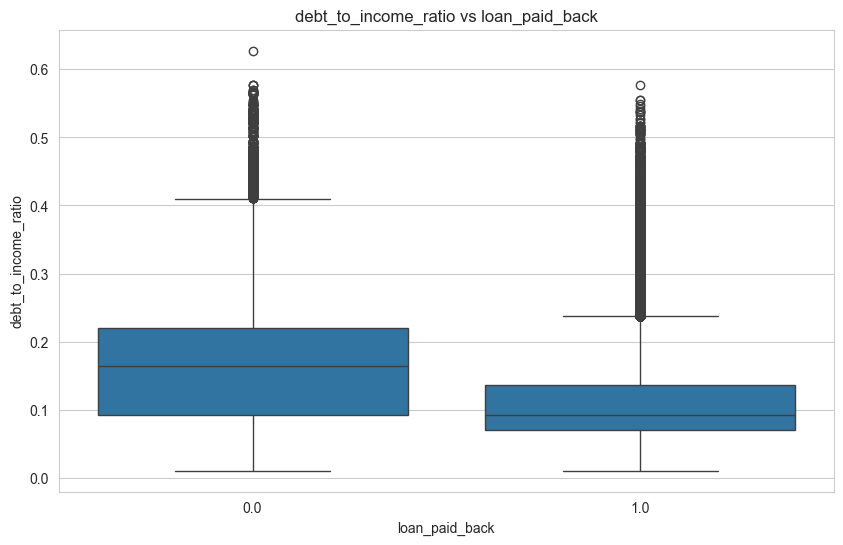

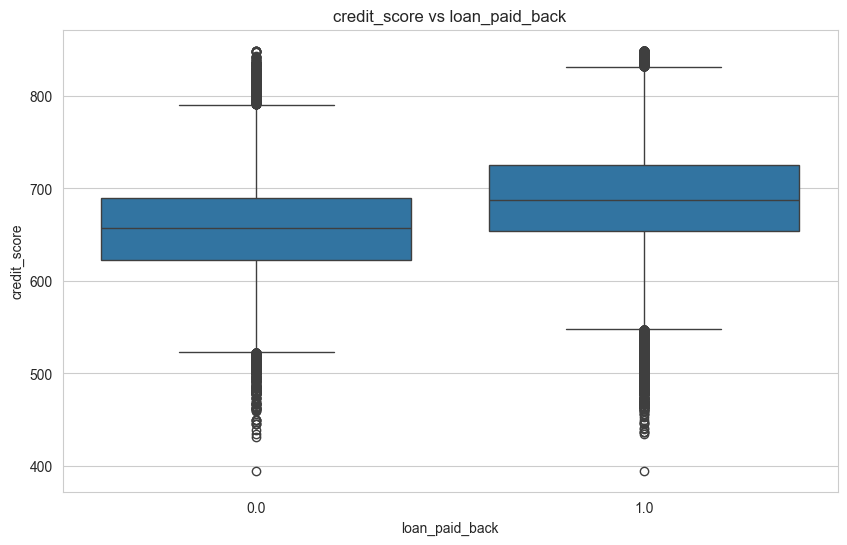

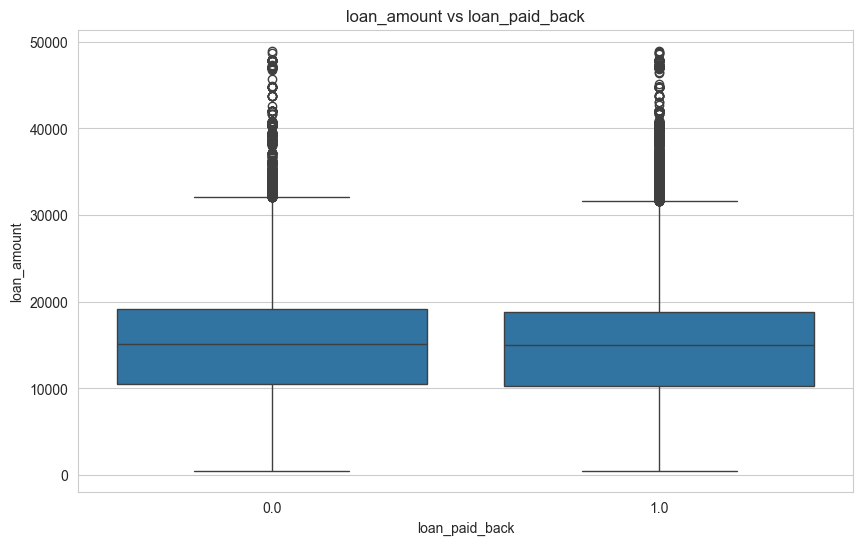

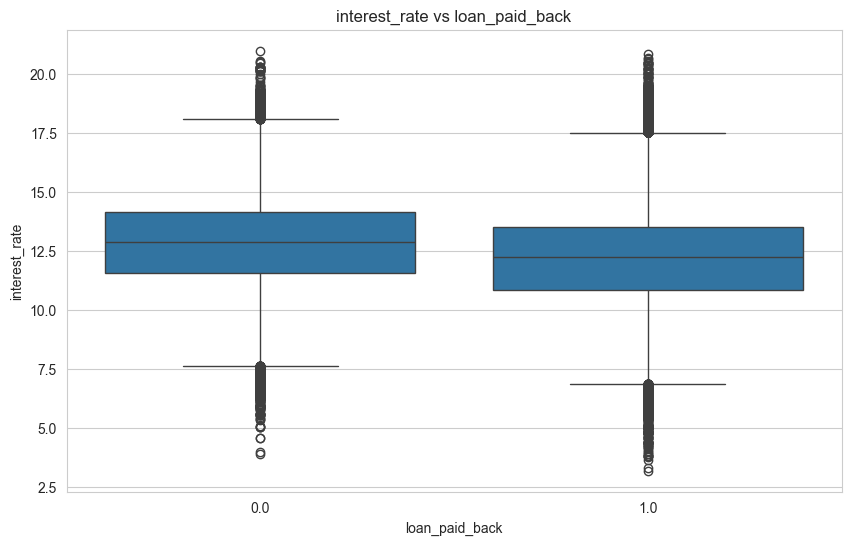

In [11]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_col, y=col, data=train_df)
    plt.title(f'{col} vs {target_col}')
    plt.show()

### 6.2 Categorical Features vs Target

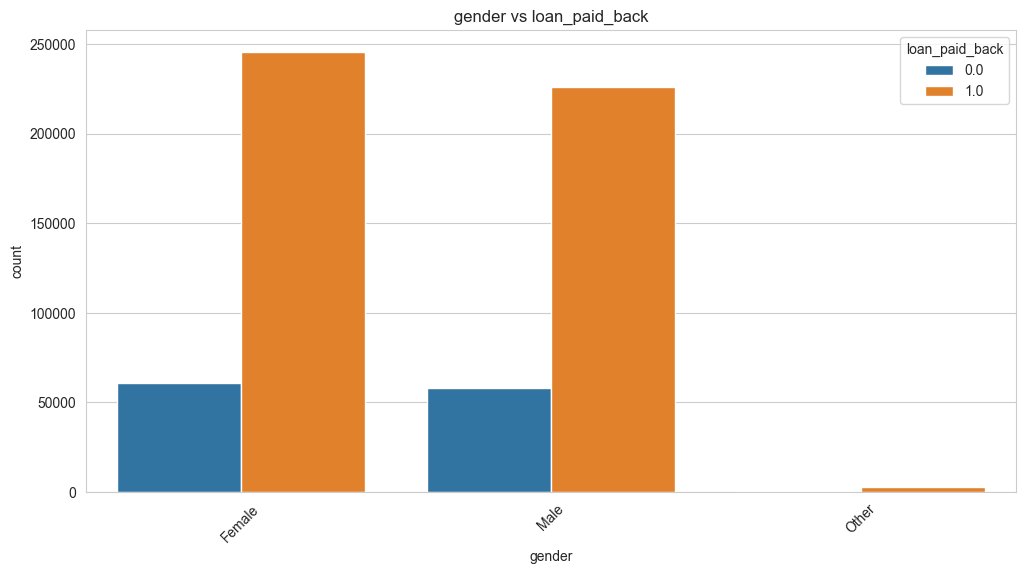

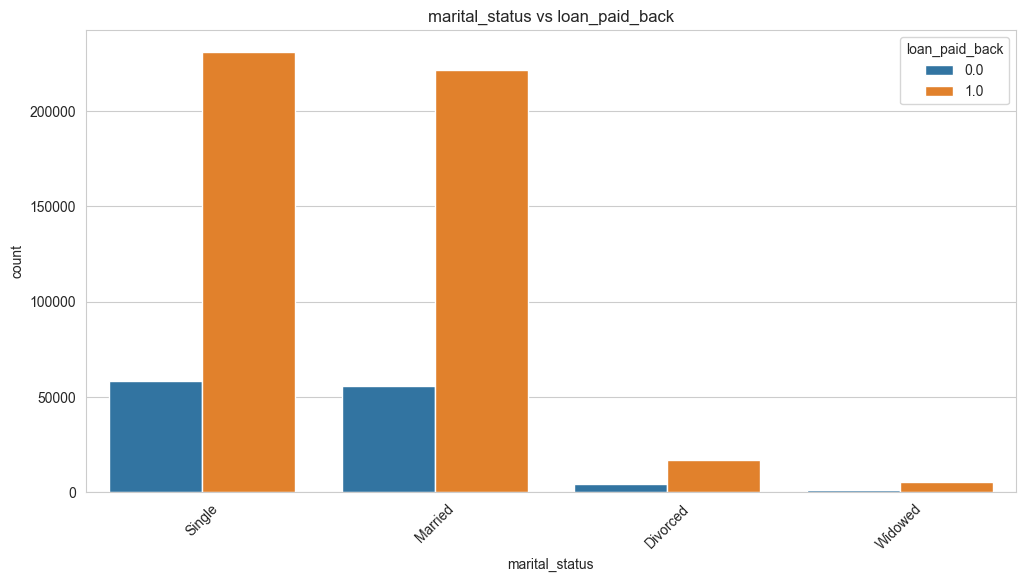

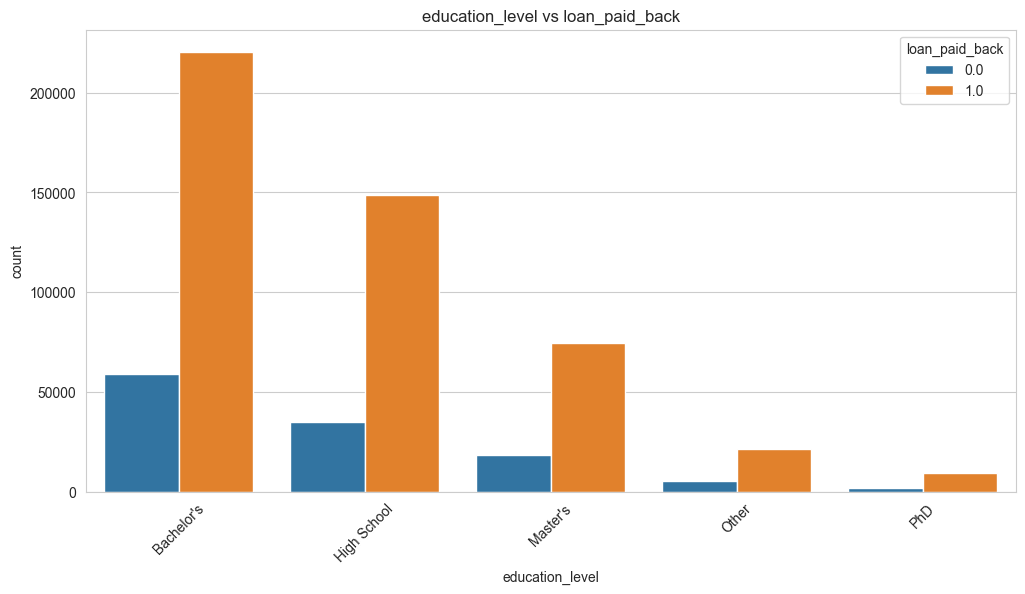

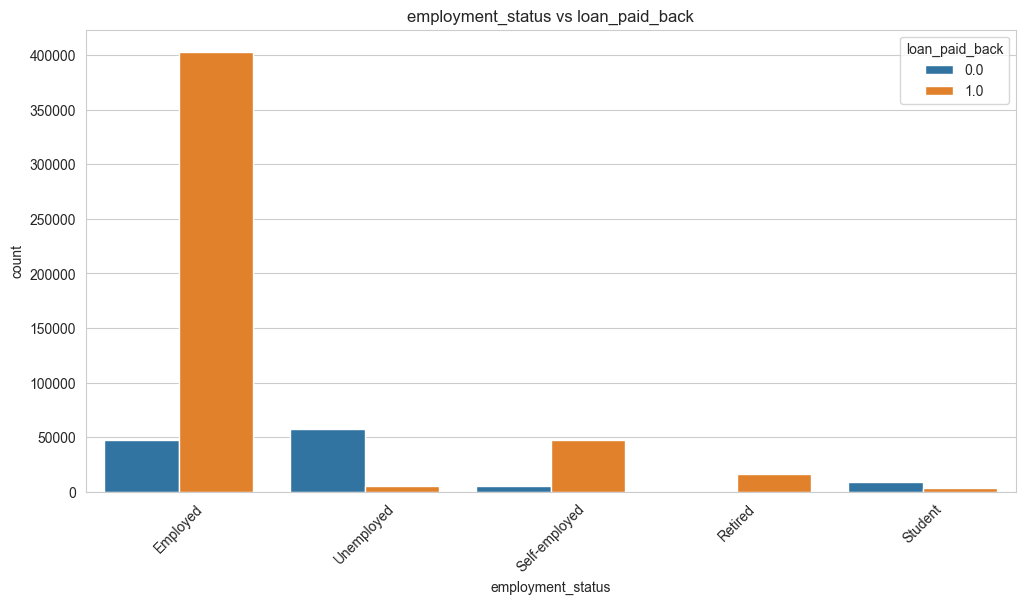

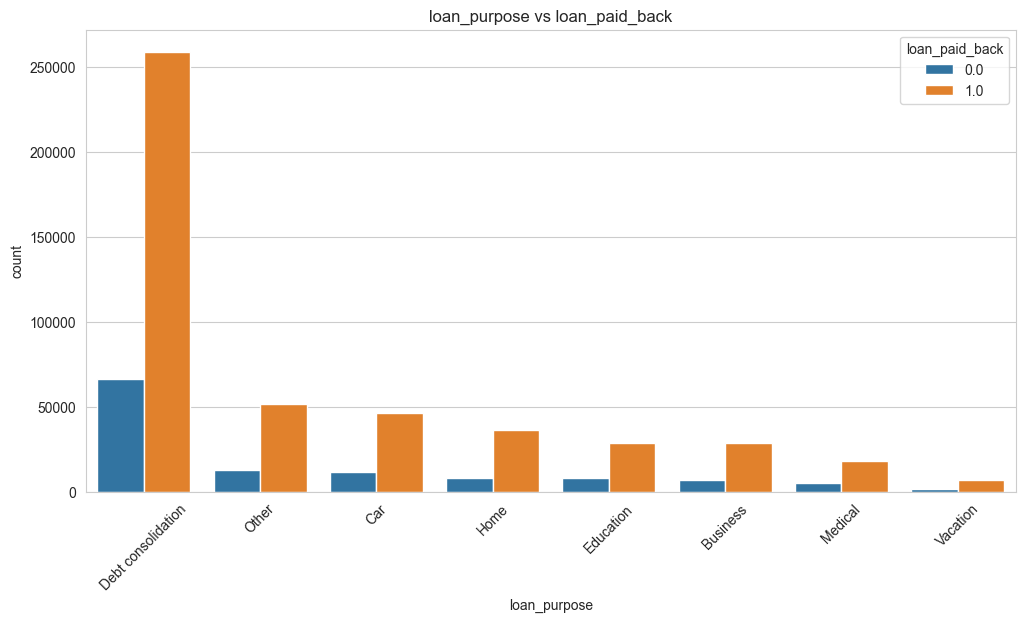

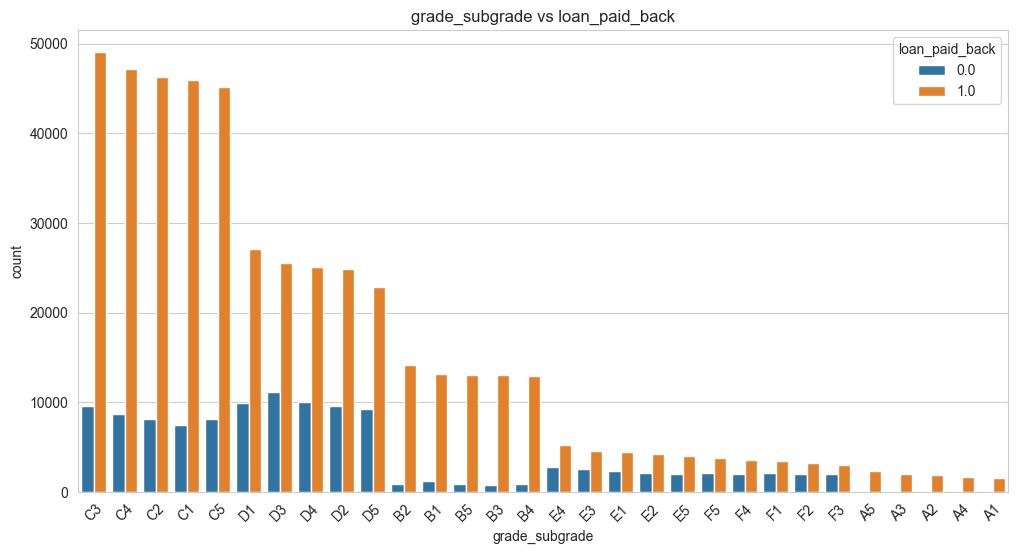

In [12]:
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue=target_col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.legend(title=target_col)
    plt.show()

## 7. Correlation Analysis

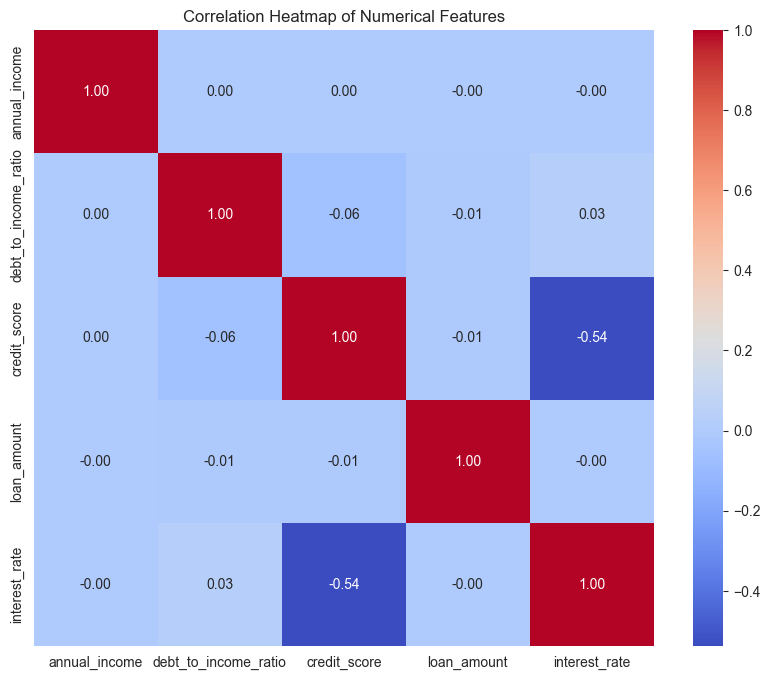

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## 8. Summary of Findings

Based on the analysis of `eda.ipynb`, here are the key insights regarding the Loan Payback dataset:

### 1. Dataset Overview
*   **Size**: The training set contains **593,994 entries** and 13 columns. The test set has **254,569 entries**.
*   **Data Quality**: There are **no missing values** in the training dataset, which simplifies preprocessing.
*   **Target Variable**: The dataset is **imbalanced**.
    *   `1.0` (Loan Paid Back): **~79.9%**
    *   `0.0` (Loan Not Paid Back): **~20.1%**
    *   *Implication*: Accuracy alone might be a misleading metric; ROC AUC (the competition metric) is appropriate here.

### 2. Numerical Feature Insights
*   **Interest Rate**: This appears to be a strong predictor. There is a clear **negative correlation** with the target; loans with higher interest rates are less likely to be paid back.
*   **Credit Score**: Shows a **positive correlation** with loan repayment. Higher credit scores indicate a higher likelihood of payback.
*   **Debt-to-Income (DTI) Ratio**: Shows a **negative correlation**. Borrowers with higher DTI ratios are at higher risk of defaulting.
*   **Distributions**: Features like `annual_income`, `loan_amount`, and `debt_to_income_ratio` are right-skewed, suggesting that log-transformation or robust scaling might be beneficial for some models.

### 3. Categorical Feature Insights
*   **Grade/Subgrade**: This is likely the **most predictive feature**. There is a strong visible trend where "better" grades (e.g., A, B) have much higher repayment rates compared to lower grades (e.g., F, G). This feature contains significant information about the borrower's risk profile.
*   **Loan Purpose**: Different loan purposes show varying repayment probabilities. For example, loans for "Small business" might carry different risks compared to "Debt consolidation".
*   **Employment & Education**: Borrowers with higher education levels (e.g., PhD, Master's) and those who are "Employed" (vs. Self-employed) tend to have marginally higher repayment rates.
*   **Gender**: Appears to have a minimal impact on the target variable compared to financial metrics.

### 4. Recommendations for Modeling
*   **Feature Engineering**:
    *   `grade_subgrade`: Since this is ordinal (A1 > A2 > ... > G5), encoding it as an ordinal integer or using target encoding could be very effective.
    *   **Skewed Features**: Consider log-transforming `annual_income` and `loan_amount`.
*   **Imbalance Handling**: Techniques like class weighting (e.g., `scale_pos_weight` in XGBoost/LightGBM) or resampling might help, though tree-based models often handle this well with proper tuning.
*   **Model Choice**: Gradient boosting models (XGBoost, LightGBM, CatBoost) are likely to perform well given the mix of categorical and numerical data and the dataset size.